# Modelos de Agrupamento

Um modelo de agrupamento bayesiano serve para agrupar dados com características similares, utilizando-se de princípios da estatística bayesiana. Além de realizar a tarefa de agrupamento, este modelo pode ser empregado como auxílio para um classificador. A seguir, abordaremos como implementar uma versão bayesiana de um algoritmo de agrupamento, aproveitando os benefícios da inferência bayesiana para melhorar a precisão e a interpretabilidade dos grupos identificados.

# Exemplo 1 (Gerado automaticamente)

In [ ]:
import random
import matplotlib.pyplot as plt

g1 = [(1+0.5*random.uniform(-1,1),1+0.5*random.uniform(-1,1)) for _ in range(20)]
g2 = [(4+0.5*random.uniform(-1,1),5+0.5*random.uniform(-1,1)) for _ in range(20)]
g3 = [(3+0.5*random.uniform(-1,1),3+0.5*random.uniform(-1,1)) for _ in range(40)]

points = g1 + g2 + g3

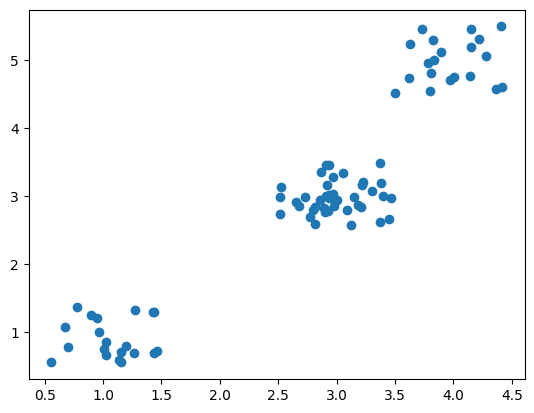

In [ ]:
x_val = [item[0] for item in points]
y_val = [item[1] for item in points]
plt.scatter(x_val, y_val)
plt.show()


In [ ]:
import numpy as np
pointsnp = np.array(points)

In [ ]:
import pymc as pm
import pytensor.tensor as at

with pm.Model() as model:
  w = pm.Dirichlet("w",[1/3,1/3,1/3])
  c1 = pm.Normal("c1",1,1,shape=2)
  c2 = pm.Normal("c2",4,1,shape=2)
  c3 = pm.Normal("c3",3,1,shape=2)

  sigmax = pm.HalfNormal('sigmax', sigma=1, shape=3)
  sigmay = pm.HalfNormal('sigmay', sigma=1, shape=3)

  covs0 = at.stack([
        at.stack([sigmax[0], 0]),
        at.stack([0, sigmay[0]])
    ])
  covs1 = at.stack([
        at.stack([sigmax[1], 0]),
        at.stack([0, sigmay[1]])
    ])
  covs2 = at.stack([
        at.stack([sigmax[2], 0]),
        at.stack([0, sigmay[2]])
    ])

  components = [pm.MvNormal.dist(c1, covs0)
               ,pm.MvNormal.dist(c2, covs1)
               ,pm.MvNormal.dist(c3, covs2)]
  pm.Mixture("g",w,components,observed=points)

In [ ]:
with model:
    trace = pm.sample()

In [ ]:
pm.summary(trace)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c1[0],0.932,0.070,0.809,1.074,0.001,0.001,3453.0,1516.0,1.00
c1[1],0.915,0.082,0.773,1.073,0.001,0.001,3978.0,1524.0,1.00
c2[0],4.105,0.076,3.968,4.251,0.001,0.001,2889.0,1258.0,1.01
c2[1],4.917,0.077,4.771,5.066,0.002,0.001,2735.0,1238.0,1.00
c3[0],2.961,0.045,2.875,3.042,0.001,0.001,3815.0,1355.0,1.00
c3[1],2.989,0.048,2.900,3.077,0.001,0.001,3856.0,1260.0,1.01
w[0],0.251,0.047,0.166,0.339,0.001,0.001,2663.0,1640.0,1.00
w[1],0.251,0.047,0.164,0.339,0.001,0.001,2412.0,1643.0,1.00
w[2],0.497,0.055,0.395,0.599,0.001,0.001,1973.0,1102.0,1.00
sigmax[0],0.100,0.040,0.042,0.166,0.001,0.001,2550.0,1331.0,1.00


In [ ]:
with model:
    posterior_predictive = pm.sample_posterior_predictive(trace,var_names=['g'])

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


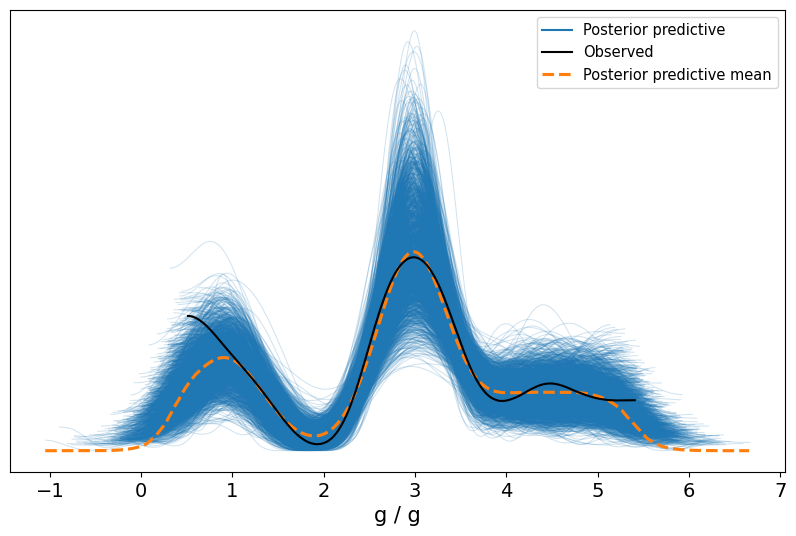

In [ ]:
import arviz as az

az.plot_ppc(posterior_predictive, mean=True, figsize=(10, 6), textsize=14)

plt.show()


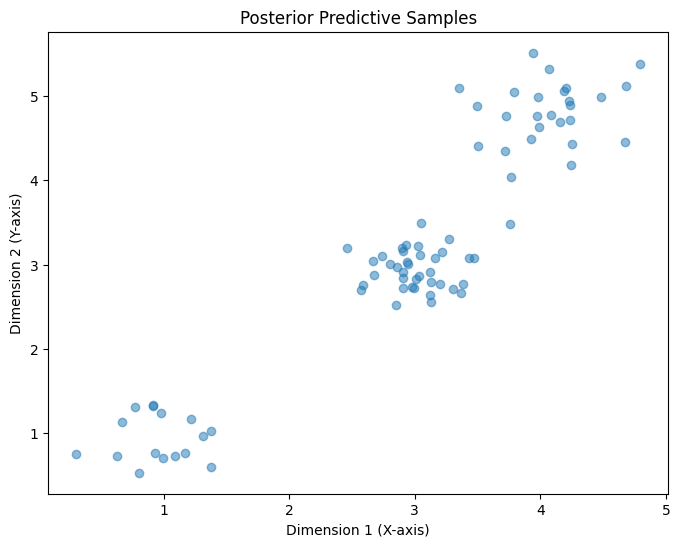

In [ ]:
posterior_predictive_samples = posterior_predictive.posterior_predictive['g']

num_samples_to_plot = 1

indices_to_plot = np.random.choice(posterior_predictive_samples.shape[1], num_samples_to_plot, replace=False)

plt.figure(figsize=(8, 6))
for idx in indices_to_plot:
    plt.scatter(posterior_predictive_samples[0, idx, :, 0],
                posterior_predictive_samples[0, idx, :, 1],
                alpha=0.5)

plt.xlabel('Dimension 1 (X-axis)')
plt.ylabel('Dimension 2 (Y-axis)')
plt.title('Posterior Predictive Samples')
plt.show()

# Exemplo 2 (UCIML)

Este conjunto de dados apresenta um compilado de características geométricas extraídas de uvas passas, incluindo medidas como área, excentricidade, entre outras propriedades físicas distintas. O propósito principal deste dataset é facilitar a classificação das uvas passas em duas categorias específicas: Kecimen ou Besni. Através da análise dessas informações geométricas detalhadas, busca-se desenvolver um modelo preciso que seja capaz de identificar a qual das duas variedades uma determinada uva passa pertence, auxiliando assim na automação e na precisão de processos de seleção e categorização desses frutos secos.

Çinar,İ̇lkay, Koklu,Murat, and Tasdemir,Sakir. (2023). Raisin. UCI Machine Learning Repository. https://doi.org/10.24432/C5660T.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
y = raisin.data.targets

# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)


{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar, Murat Koklu, Sakir Tasdemir

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_s = scaler.fit_transform(X)

X_df = pd.DataFrame(X_s, index=X.index, columns=X.columns)

X_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639
...,...,...,...,...,...,...,...
895,-0.116882,-0.007352,-0.133092,0.395714,-0.131228,-0.574773,-0.134624
896,-0.011650,0.084554,0.096175,0.300071,-0.007046,-1.179518,0.176693
897,0.304072,0.006700,0.887674,-0.663114,0.370041,0.778289,0.463873
898,0.146711,0.391600,-0.006246,0.711173,0.158710,-0.761804,0.338586


In [ ]:
coords = {'features': [col for col in X_df.columns]}
coords

{'features': ['Area',
  'MajorAxisLength',
  'MinorAxisLength',
  'Eccentricity',
  'ConvexArea',
  'Extent',
  'Perimeter']}

In [ ]:
with pm.Model(coords=coords) as model_2:
    μ0 = pm.Normal("m0",0,1,dims="features")
    μ1 = pm.Normal("m1",0,1,dims="features")

    w = pm.Dirichlet("w",[0.5,0.5])

    sigma0 = pm.HalfNormal('sigma0', 1, dims="features")
    sigma1 = pm.HalfNormal('sigma1', 1, dims="features")

    cov_sigma0 = at.diag(sigma0)

    cov_sigma1 = at.diag(sigma1)

    components = [pm.MvNormal.dist(μ0, cov_sigma0)
                 ,pm.MvNormal.dist(μ1, cov_sigma1)]
    g = pm.Mixture("g",w,components,observed=X_df.values)



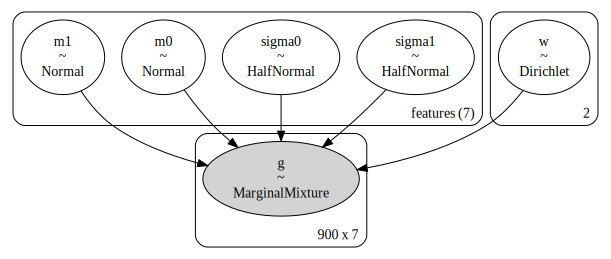

In [ ]:
pm.model_to_graphviz(model_2)

In [ ]:
with model_2:
  trace = pm.sample()

In [ ]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
m0[Area],-0.593,0.019,-0.630,-0.559,0.000,0.000,3577.0,1431.0,1.00
m0[MajorAxisLength],-0.596,0.021,-0.635,-0.553,0.000,0.000,3524.0,1467.0,1.00
m0[MinorAxisLength],-0.506,0.027,-0.556,-0.456,0.000,0.000,4090.0,1442.0,1.00
m0[Eccentricity],-0.294,0.045,-0.378,-0.214,0.001,0.000,4934.0,1635.0,1.00
m0[ConvexArea],-0.592,0.018,-0.623,-0.557,0.000,0.000,3446.0,1724.0,1.00
m0[Extent],0.087,0.033,0.020,0.146,0.000,0.000,5497.0,1520.0,1.00
m0[Perimeter],-0.598,0.022,-0.638,-0.558,0.000,0.000,3671.0,1422.0,1.00
m1[Area],1.052,0.052,0.954,1.144,0.001,0.001,3531.0,1581.0,1.00
m1[MajorAxisLength],1.059,0.047,0.976,1.149,0.001,0.000,5008.0,1662.0,1.00
m1[MinorAxisLength],0.899,0.053,0.798,0.995,0.001,0.001,4019.0,1516.0,1.00


In [ ]:
with model_2:
  trace_post = pm.sample_posterior_predictive(trace)

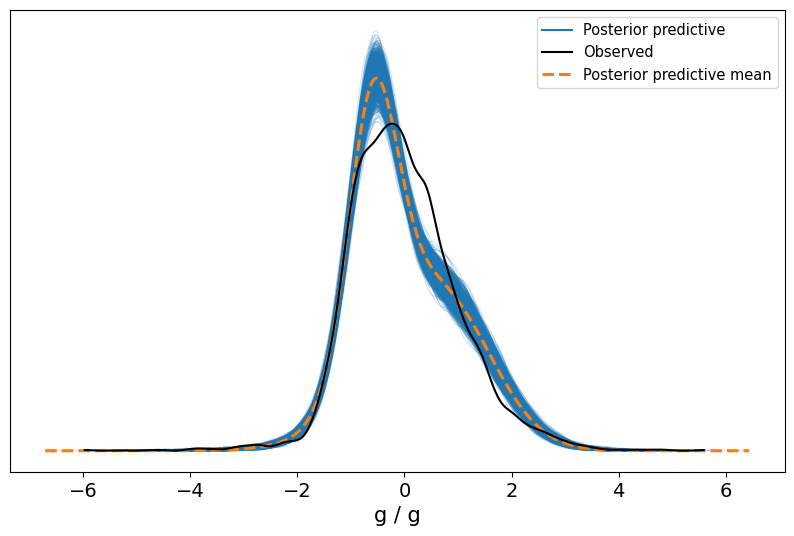

In [ ]:
az.plot_ppc(trace_post, mean=True, figsize=(10, 6), textsize=14)

plt.show()

In [ ]:
trace_post.posterior_predictive

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000, g_dim_2: 900, g_dim_3: 7)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * g_dim_2  (g_dim_2) int64 0 1 2 3 4 5 6 7 ... 892 893 894 895 896 897 898 899
  * g_dim_3  (g_dim_3) int64 0 1 2 3 4 5 6
Data variables:
    g        (chain, draw, g_dim_2, g_dim_3) float64 0.6239 0.6244 ... 0.1025
Attributes:
    created_at:                 2024-04-03T19:36:21.472818
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.10.4

In [ ]:
g_samples = trace_post.posterior_predictive["g"]

mean_predictions = g_samples.mean(dim=('chain', 'draw')).values

clusters = np.argmax(mean_predictions, axis=1)

clusters

array([0, 4, 2, 0, 4, 5, 6, 3, 3, 5, 1, 1, 3, 3, 0, 5, 0, 0, 0, 4, 3, 5,
       1, 2, 5, 4, 6, 4, 5, 6, 6, 2, 3, 3, 1, 2, 5, 2, 2, 5, 6, 0, 3, 3,
       5, 4, 5, 5, 4, 5, 0, 4, 2, 5, 6, 5, 0, 4, 5, 1, 3, 4, 2, 3, 1, 3,
       4, 6, 4, 4, 2, 6, 2, 5, 0, 6, 3, 5, 3, 4, 5, 2, 2, 6, 5, 4, 2, 1,
       5, 5, 2, 1, 1, 0, 5, 4, 5, 0, 1, 3, 1, 5, 4, 3, 5, 1, 2, 0, 3, 3,
       5, 3, 0, 3, 0, 3, 4, 5, 2, 2, 3, 0, 3, 5, 1, 5, 3, 1, 2, 0, 2, 5,
       1, 3, 3, 5, 1, 5, 3, 5, 3, 4, 0, 2, 4, 5, 4, 2, 1, 1, 5, 6, 0, 5,
       2, 6, 0, 3, 6, 6, 0, 2, 1, 5, 4, 2, 2, 5, 4, 3, 5, 4, 4, 5, 3, 5,
       1, 1, 5, 3, 3, 0, 6, 1, 5, 3, 5, 6, 6, 6, 3, 0, 0, 3, 2, 5, 2, 2,
       5, 4, 1, 0, 3, 6, 5, 3, 3, 2, 5, 2, 0, 4, 2, 6, 2, 0, 6, 5, 0, 5,
       3, 0, 2, 4, 1, 6, 3, 6, 3, 1, 1, 2, 4, 3, 5, 2, 4, 6, 4, 3, 6, 5,
       3, 2, 6, 5, 3, 4, 1, 3, 5, 3, 5, 2, 5, 3, 2, 4, 3, 3, 3, 0, 3, 2,
       3, 5, 6, 5, 4, 0, 5, 3, 0, 6, 5, 5, 5, 0, 4, 0, 5, 4, 2, 5, 3, 0,
       2, 2, 6, 4, 4, 6, 3, 3, 3, 5, 3, 3, 0, 2, 2,

In [ ]:
X_df["Cluster"] = clusters
X_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Cluster
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274,0
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252,4
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945,2
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915,0
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639,4
...,...,...,...,...,...,...,...,...
895,-0.116882,-0.007352,-0.133092,0.395714,-0.131228,-0.574773,-0.134624,0
896,-0.011650,0.084554,0.096175,0.300071,-0.007046,-1.179518,0.176693,4
897,0.304072,0.006700,0.887674,-0.663114,0.370041,0.778289,0.463873,0
898,0.146711,0.391600,-0.006246,0.711173,0.158710,-0.761804,0.338586,1


# Exercícios

1) Faça uma regressão logística hierárquica usando os clusters acima. Qual foi a acurácia obtida pelo modelo?

2) Use o modelo acima para calcular os clusters do conjunto de dados sobre o mercado imobiliário da Califórnia.